In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import plotly.graph_objs as go
from google.colab import files
import plotly.express as px
import math 


In [ ]:
uploaded= files.upload()
pdata = pd.read_excel('newdata.xlsx')
df = pd.DataFrame({'pressure(psig)':pdata['pressure']})
df

Saving newdata.xlsx to newdata.xlsx


,pressure(psig)
0,3000
1,2800
2,2600
3,2400
4,2200
5,2000
6,1800
7,1600
8,1400
9,1200


In [ ]:
perm = float(input('Enter the permeability of the reservoir:\n'))
print(f'{perm} md')

ofv = float(input('Enter the oil formation volume factor value: \n '))
print(f'{ofv} bbl/stb')

skin = float(input('Enter the Skin value: \n'))

visco = float(input('Enter the viscosity of crude oil:\n '))
print(f'{visco} Cp')

height = float(input('Enter the Height Of the Pay Zone: \n'))
print(f'{height} ft')

R_pressure = float(input('Enter the initial Reservoir pressure: \n'))
print(f'{R_pressure} psi')

re = float(input('Enter the Drianage are of Reservoir: \n '))
print(f'{re} ft')

rw = float(input('Enter the Well bore radius:\n '))
print(f'{rw} ft')

q = round((perm*height*R_pressure)/(141.2*ofv*visco*(math.log(re/rw)+(skin))),2)

print(f'qmax ={q} bbl/day')

Enter the permeability of the reservoir:
13
13.0 md
Enter the oil formation volume factor value: 
 1.3
1.3 bbl/stb
Enter the Skin value: 
0
Enter the viscosity of crude oil:
 1.7
1.7 Cp
Enter the Height Of the Pay Zone: 
115
115.0 ft
Enter the initial Reservoir pressure: 
3000
3000.0 psi
Enter the Drianage are of Reservoir: 
 1490
1490.0 ft
Enter the Well bore radius:
 0.4
0.4 ft
qmax =1747.89 bbl/day


In [ ]:
qipr1,j1 = list(), list()
Pp = pdata['pressure']
length = len(Pp)
j = np.where(Pp==R_pressure)
b=int(j[0])
l=b+1

qipr = q*(1- 0.2*((Pp[0])/(R_pressure))-0.8*((Pp[0])/(R_pressure))**2)
j = (qipr)/(R_pressure-Pp[0])

for i in range(0,length):
  qipr = q*(1- 0.2*((Pp[i])/(R_pressure))-0.8*((Pp[i])/(R_pressure))**2)
  qipr1.append(qipr)
  j = (qipr)/(R_pressure-Pp[i])
  j1.append(j)


df['q'] = qipr1
df['J'] = j1
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning:

invalid value encountered in double_scalars

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning:

invalid value encountered in double_scalars



,pressure(psig),q,J
0,3000,0.00000,NaN
1,2800,203.53208,1.017660
2,2600,394.63472,0.986587
3,2400,573.30792,0.955513
4,2200,739.55168,0.924440
5,2000,893.36600,0.893366
6,1800,1034.75088,0.862292
7,1600,1163.70632,0.831219
8,1400,1280.23232,0.800145
9,1200,1384.32888,0.769072


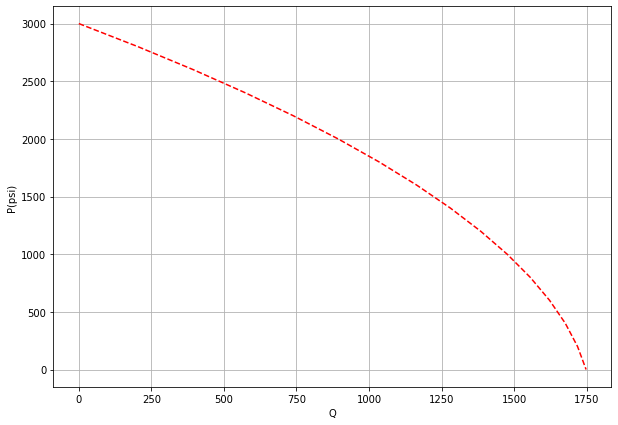

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(qipr1,Pp,'--',color='r')
plt.xlabel("Q")
plt.ylabel("P(psi)")
plt.plot()
plt.grid()
plt.show()

In [ ]:
fig=go.Figure()
fig = px.line(df, x="q", y="pressure(psig)",)
fig.update_layout(title= f'IPR ',width=800, height=450)
fig.show()
